#### Job Satisfaction

In this notebook, you will be exploring job satisfaction according to the survey results.  Use the cells at the top of the notebook to explore as necessary, and use your findings to solve the questions at the bottom of the notebook.

In [1]:
import pandas as pd
import numpy as np
import JobSatisfaction as t
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#Taking a look at the distribution of the various professions
Profession_of_respondents = df.Professional.value_counts()
Profession_of_respondents

Professional developer                                  13774
Student                                                  2821
Professional non-developer who sometimes writes code     1782
None of these                                             368
Used to be a professional developer                       357
Name: Professional, dtype: int64

In [3]:
#Checking the all the column titles
for i in df.columns:
    print (i)

Respondent
Professional
ProgramHobby
Country
University
EmploymentStatus
FormalEducation
MajorUndergrad
HomeRemote
CompanySize
CompanyType
YearsProgram
YearsCodedJob
YearsCodedJobPast
DeveloperType
WebDeveloperType
MobileDeveloperType
NonDeveloperType
CareerSatisfaction
JobSatisfaction
ExCoderReturn
ExCoderNotForMe
ExCoderBalance
ExCoder10Years
ExCoderBelonged
ExCoderSkills
ExCoderWillNotCode
ExCoderActive
PronounceGIF
ProblemSolving
BuildingThings
LearningNewTech
BoringDetails
JobSecurity
DiversityImportant
AnnoyingUI
FriendsDevelopers
RightWrongWay
UnderstandComputers
SeriousWork
InvestTimeTools
WorkPayCare
KinshipDevelopers
ChallengeMyself
CompetePeers
ChangeWorld
JobSeekingStatus
HoursPerWeek
LastNewJob
AssessJobIndustry
AssessJobRole
AssessJobExp
AssessJobDept
AssessJobTech
AssessJobProjects
AssessJobCompensation
AssessJobOffice
AssessJobCommute
AssessJobRemote
AssessJobLeaders
AssessJobProfDevel
AssessJobDiversity
AssessJobProduct
AssessJobFinances
ImportantBenefits
ClickyKeys
Jo

In [4]:
#Number of missing values in the JobSatisfaction column
missing_job_satisfaction= df["JobSatisfaction"].isnull().sum()
missing_job_satisfaction

3849

In [5]:
#Proportion of rows with missing values in relation to the entire dataset
Proportion_missing_job_satisfaction = missing_job_satisfaction/df.shape[0]
Proportion_missing_job_satisfaction

0.20149722542142184

Text(0.5,1,'How satisfied are you with your job')

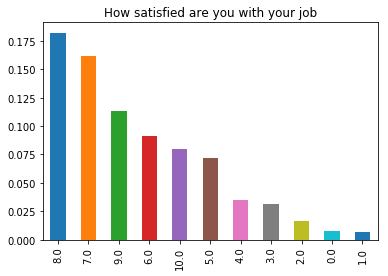

In [6]:
#Group with highest Job satisfaction
proportion_j_s = df["JobSatisfaction"].value_counts()
(proportion_j_s/df.shape[0]).plot(kind = "bar")
plt.title("How satisfied are you with your job")

Employed full-time                                      13655
Independent contractor, freelancer, or self-employed     1866
Employed part-time                                       1168
Not employed, and not looking for work                   1066
Not employed, but looking for work                        906
I prefer not to say                                       381
Retired                                                    60
Name: EmploymentStatus, dtype: int64


Text(0.5,1,'What kind of employment do you have?')

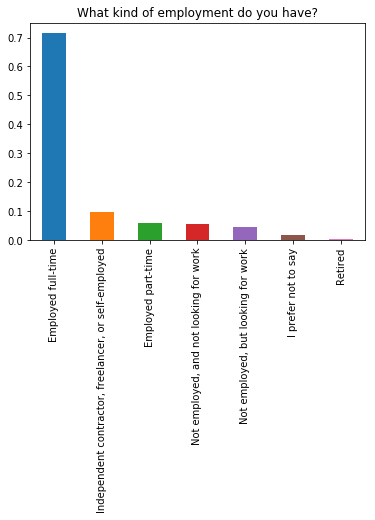

In [7]:
#Distribution based on employment status
Employment_status_chart = df.EmploymentStatus.value_counts()
print(Employment_status_chart)
(Employment_status_chart/df.shape[0]).plot(kind = "bar")
plt.title("What kind of employment do you have?")

Text(0.5,1,'How satisfied are you with your job')

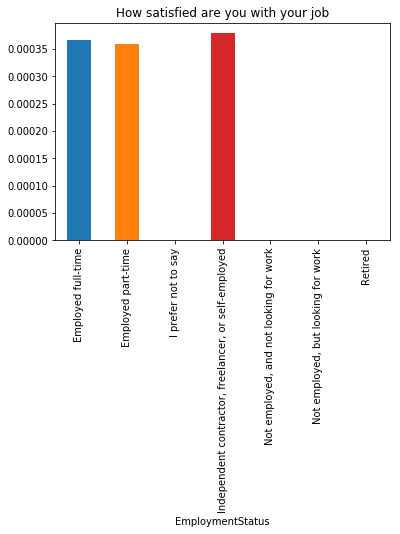

In [8]:
#Job satisfaction by Employment status
chart= df.groupby(['EmploymentStatus']).mean()['JobSatisfaction']
(chart/df.shape[0]).plot(kind = "bar")
plt.title("How satisfied are you with your job")

CompanySize
1,000 to 4,999 employees    6.908506
10 to 19 employees          7.035739
10,000 or more employees    6.793617
100 to 499 employees        7.029324
20 to 99 employees          6.997039
5,000 to 9,999 employees    6.832155
500 to 999 employees        7.029967
Fewer than 10 employees     7.025719
I don't know                7.054622
I prefer not to answer      7.284946
Name: JobSatisfaction, dtype: float64


Text(0.5,1,'How satisfied are employees based on company size')

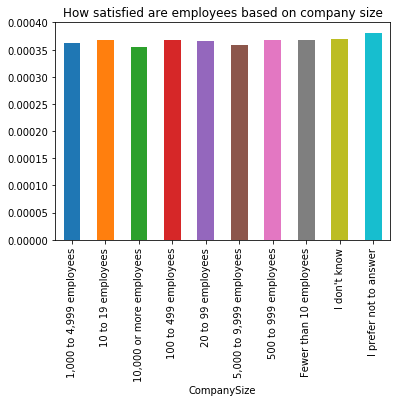

In [9]:
#Job satisfaction by Company size
chart1= df.groupby(['CompanySize']).mean()['JobSatisfaction']
print(chart1)
(chart1/df.shape[0]).plot(kind = "bar")
plt.title("How satisfied are employees based on company size")

#### Question 1

**1.** Use the space above to assist in matching each variable (a, b, c, d, e, f, g, or h) as the appropriate key that describes the value in the **job_sol_1** dictionary.

In [10]:
a = 0.734
b = 0.2014
c = 'full-time'
d = 'contractors'
e = 'retired'
f = 'yes'
g = 'no'
h = 'hard to tell'

job_sol_1 = {'The proportion of missing values in the Job Satisfaction column': b,
             'According to EmploymentStatus, which group has the highest average job satisfaction?':c, 
             'In general, do smaller companies appear to have employees with higher job satisfaction?': f}
             
t.jobsat_check1(job_sol_1)

Oops! Though it wasn't what I was expecting either, the job category with the highest job satisfaction was not fulltime nor retired individuals!


#### Question 2

**2.** Use the space above to assist in matching each variable (a, b, c) as the appropriate key that describes the value in the **job_sol_2** dictionary. Notice you can have the same letter appear more than once.

ProgramHobby
No                                           6.874806
Yes, I contribute to open source projects    7.158649
Yes, I program as a hobby                    6.927150
Yes, both                                    7.189316
Name: JobSatisfaction, dtype: float64


Text(0.5,1,'How satisfied are you with your work when you program outside')

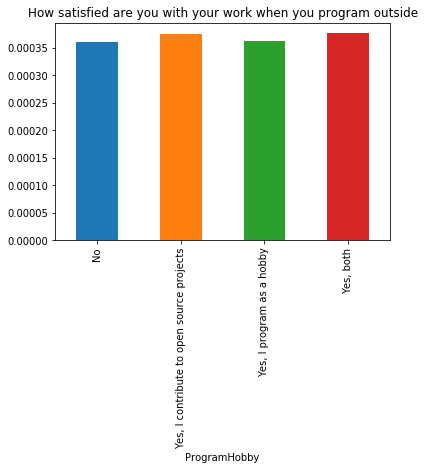

In [11]:
#Job satisfaction by Hobby
chart2 = df.groupby(['ProgramHobby']).mean()['JobSatisfaction']
print(chart2)
(chart2/df.shape[0]).plot(kind = "bar")
plt.title("How satisfied are you with your work when you program outside")

HomeRemote
A few days each month                                      7.096694
About half the time                                        7.125737
All or almost all the time (I'm full-time remote)          7.405421
It's complicated                                           6.942053
Less than half the time, but at least one day each week    7.143786
More than half, but not all, the time                      6.973684
Never                                                      6.697127
Name: JobSatisfaction, dtype: float64


Text(0.5,1,'Does flexibility have influence on your satisfaction')

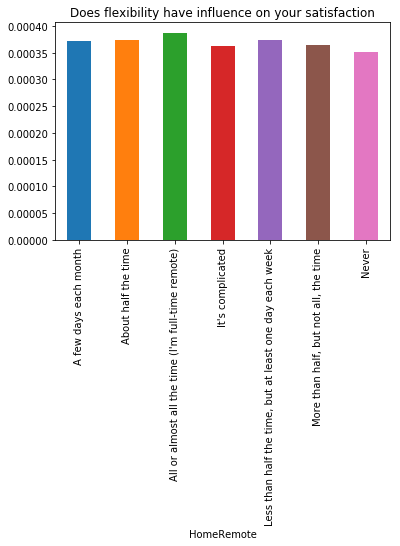

In [12]:
#Job satisfaction by distance to work
chart3= df.groupby(['HomeRemote']).mean()['JobSatisfaction']
print(chart3)
(chart3/df.shape[0]).plot(kind = "bar")
plt.title("Does flexibility have influence on your satisfaction")

In [13]:
#Job satisfaction by Education status
chart4 = df.groupby(['FormalEducation']).mean()['JobSatisfaction']
print(chart4)

FormalEducation
Bachelor's degree                                                    6.900293
Doctoral degree                                                      7.438492
I never completed any formal education                               7.000000
I prefer not to answer                                               7.211679
Master's degree                                                      6.977356
Primary/elementary school                                            6.946237
Professional degree                                                  7.075893
Secondary school                                                     7.219512
Some college/university study without earning a bachelor's degree    7.151268
Name: JobSatisfaction, dtype: float64


In [14]:
a = 'yes'
b = 'no'
c = 'hard to tell'

job_sol_2 = {'Do individuals who program outside of work appear to have higher JobSatisfaction?':a,
             'Does flexibility to work outside of the office appear to have an influence on JobSatisfaction?': a, 
             'A friend says a Doctoral degree increases the chance of having job you like, does this seem true?': a}
             
t.jobsat_check2(job_sol_2)

Nice job! That's what we found as well!
